# Data Analysis of -Grades: University of Wisconsin, Madison-
## I will attempt to analyze this dataset containing 10 years worth information on
### -Professors/Grades/Course/Class Schedule/Departments


In [1]:
#import of necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set()
from scipy import stats
import matplotlib.pyplot as plt 
import sqlite3 
from shutil import copyfile # copy database func

# move the database into a writeable format
copyfile('import/database.sqlite3', './database.sqlite3')

# open connection
conn = sqlite3.connect('./database.sqlite3')
conn

In [2]:
#Create dataframe that displays Teacher his/her classes and grade distribution 
teacher_vs_grade = pd.read_sql("""SELECT * FROM instructors
               INNER JOIN teachings 
                   ON instructors.id = teachings.instructor_id
               INNER JOIN sections
                   ON teachings.section_uuid = sections.uuid
               INNER JOIN grade_distributions
                   On sections.course_offering_uuid = grade_distributions.course_offering_uuid
            """, conn)

In [3]:
teacher_vs_grade.head(3)

,id,name,instructor_id,section_uuid,uuid,course_offering_uuid,section_type,number,room_uuid,schedule_uuid,...,other_count,bc_count,u_count,d_count,ab_count,a_count,s_count,i_count,b_count,nr_count
0,761703,JOHN ARCHAMBAULT,761703,45adf63c-48c9-3659-8561-07556d2d4ddf,45adf63c-48c9-3659-8561-07556d2d4ddf,344b3ebe-da7e-314c-83ed-9425269695fd,FLD,1,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90,...,0,0,0,0,0,105,0,0,0,0
1,761703,JOHN ARCHAMBAULT,761703,c6280e23-5e43-3859-893e-540d94993529,c6280e23-5e43-3859-893e-540d94993529,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,FLD,1,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90,...,0,0,0,0,0,158,0,1,0,0
2,761703,JOHN ARCHAMBAULT,761703,9395dc21-15d1-3fab-8d1f-6f3fe6114c48,9395dc21-15d1-3fab-8d1f-6f3fe6114c48,ea3b717c-d66b-30dc-8b37-964d9688295f,FLD,1,04368a56-c959-3e4b-8b3d-f4cc3538fea5,f2d66a4d-0c08-3b48-abf6-649fffd7ae90,...,0,0,0,0,12,139,0,0,2,0


In [4]:
#drop irrelevant columns
tvg_clean = teacher_vs_grade.drop(['instructor_id','uuid','course_offering_uuid','section_type','number', 'room_uuid', 'schedule_uuid'], axis=1)

# trouble adding grade values thus dict to convert str values to int

int_cols = {'n_count': int, 
              'c_count': int,
              'f_count': int, 
              'cr_count': int, 
              'p_count': int, 
              'nw_count': int, 
              'other_count': int, 
              'bc_count': int,
              'u_count': int, 
              'd_count': int, 
              'ab_count': int, 
              'a_count': int, 
              's_count': int, 
              'i_count': int,
              'b_count': int, 
              'nr_count': int
           }
tvg_clean = tvg_clean.astype(int_cols) 

In [5]:
# calculate and add average GPA per course to dataframe 

tvg_clean['avg_gpa']=(((tvg_clean['a_count']*4)+(tvg_clean['ab_count']*3.5)+(tvg_clean['b_count']*3)+(tvg_clean['bc_count']*2.5)+
(tvg_clean['c_count']*2)+(tvg_clean['d_count']*1))/(tvg_clean['a_count']+tvg_clean['ab_count']+tvg_clean['b_count']+tvg_clean['bc_count']+
tvg_clean['c_count']+tvg_clean['d_count']))
tvg_clean.head(2)

,id,name,section_uuid,section_number,n_count,c_count,f_count,cr_count,p_count,nw_count,...,bc_count,u_count,d_count,ab_count,a_count,s_count,i_count,b_count,nr_count,avg_gpa
0,761703,JOHN ARCHAMBAULT,45adf63c-48c9-3659-8561-07556d2d4ddf,1,0,0,0,0,0,0,...,0,0,0,0,105,0,0,0,0,4.0
1,761703,JOHN ARCHAMBAULT,c6280e23-5e43-3859-893e-540d94993529,1,0,0,0,0,0,0,...,0,0,0,0,158,0,1,0,0,4.0


In [6]:
# id column is also stored as a string will need to change 
id_col = {'id': int,}

# calculate and add the probability of receiving a specific grade based on all previous data 
tvg_clean1 = tvg_clean.astype(id_col) 
tvg_clean1=tvg_clean1.dropna()
total=(tvg_clean1['a_count'] + tvg_clean1['ab_count'] + tvg_clean1['b_count'] + tvg_clean1['bc_count'] + tvg_clean1['c_count'] + tvg_clean1['d_count'] + tvg_clean1['f_count'])

tvg_clean1['a_prob'] =    (1.0 * tvg_clean1['a_count']) / total
tvg_clean1['ab_prob'] =  (1.0 * tvg_clean1['ab_count']) / total
tvg_clean1['<=B_prob'] = (tvg_clean1['b_count']+tvg_clean1['bc_count'] + tvg_clean1['c_count'] + tvg_clean1['d_count'] + tvg_clean1['f_count']) / total

tvg_clean1.head()
 

,id,name,section_uuid,section_number,n_count,c_count,f_count,cr_count,p_count,nw_count,...,ab_count,a_count,s_count,i_count,b_count,nr_count,avg_gpa,a_prob,ab_prob,<=B_prob
0,761703,JOHN ARCHAMBAULT,45adf63c-48c9-3659-8561-07556d2d4ddf,1,0,0,0,0,0,0,...,0,105,0,0,0,0,4.000000,1.000000,0.000000,0.000000
1,761703,JOHN ARCHAMBAULT,c6280e23-5e43-3859-893e-540d94993529,1,0,0,0,0,0,0,...,0,158,0,1,0,0,4.000000,1.000000,0.000000,0.000000
2,761703,JOHN ARCHAMBAULT,9395dc21-15d1-3fab-8d1f-6f3fe6114c48,1,0,3,0,0,0,0,...,12,139,0,0,2,0,3.910256,0.891026,0.076923,0.032051
3,3677061,STEPHANIE KANN,b99e440b-39db-350a-81eb-b6eb1bd8b0bc,1,0,3,0,0,0,0,...,12,139,0,0,2,0,3.910256,0.891026,0.076923,0.032051
4,761703,JOHN ARCHAMBAULT,ca1c841f-41d5-3298-bd25-01c65751f150,1,0,3,0,0,0,0,...,12,139,0,0,2,0,3.910256,0.891026,0.076923,0.032051


In [8]:
#find avg gpa for prof counting all his/her courses 
tvg_clean2 = tvg_clean1.groupby(['id','name']).agg(['mean','count'])
dfNew=pd.DataFrame({})
dfNew['a_prob']=tvg_clean2['a_prob']['mean']
dfNew['ab_prob']=tvg_clean2['ab_prob']['mean']
dfNew['<=B_prob']=tvg_clean2['<=B_prob']['mean']

In [9]:
dfNew.head()

,,a_prob,ab_prob,<=B_prob
id,name,,,
100191,SCOTT CRAVEN,0.401261,0.118547,0.480192
100475,DIANNA MURPHY,0.944444,0.000000,0.055556
101964,HEIDI BRITT KELLUM,0.981829,0.000000,0.018171
101997,DANIEL JOSEPH ACHESON,0.144307,0.101253,0.754440
102482,JONATHAN ANDREW FOLEY,0.644469,0.192260,0.163271


In [13]:
ls

UofW Dataset.ipynb  export/             import/             readme.txt
database.sqlite3    huy.ipynb           mulba.ipynb


In [14]:
!rm Clean.csv

dfNew.to_csv('export/clean.csv') 

rm: Clean.csv: No such file or directory


In [15]:
#data frame of professors, the number of classes they taught and there average class GPA
final_prof = pd.concat([tvg_clean2['n_count']['count'],tvg_clean2['avg_gpa']['mean']],axis = 1)
final_prof = final_prof.dropna()
final_prof.head()

,,count,mean
id,name,,
100191,SCOTT CRAVEN,14,3.191258
100475,DIANNA MURPHY,2,3.944444
101964,HEIDI BRITT KELLUM,24,3.945486
101997,DANIEL JOSEPH ACHESON,21,2.702816
102482,JONATHAN ANDREW FOLEY,10,3.733114


In [86]:
final_prof['<=B_prob'] = tvg_clean2['<=B_prob']['mean']                
final_prof['ab_prob'] = tvg_clean2['ab_prob']['mean']                  
final_prof['a_prob'] = tvg_clean2['a_prob']['mean']                  


In [87]:
final_prof.head()

,,count,mean,<=B_prob,ab_prob,a_prob
id,name,,,,,
100191,SCOTT CRAVEN,14,3.19,0.480192,0.118547,0.401261
100475,DIANNA MURPHY,2,3.94,0.055556,0.000000,0.944444
101964,HEIDI BRITT KELLUM,24,3.95,0.018171,0.000000,0.981829
101997,DANIEL JOSEPH ACHESON,21,2.70,0.754440,0.101253,0.144307
102482,JONATHAN ANDREW FOLEY,10,3.73,0.163271,0.192260,0.644469


In [88]:
# good sign that mean and median are similar 

In [89]:
final_prof['mean'].median()

3.43

In [90]:
final_prof['mean'].mean()

3.426869089099048

##### There are over 18,000 professors in this dataset. The range of classes they have taught over the years varies wildly. I will need to narrow in on what seems more normal taking into account that the next question I need to answer is whether teaching more classes improves a prof. average GPA 

In [91]:
outlier=final_prof['count']
#IQR=Q3-Q1
Q1=np.percentile(outlier,25)
Q3=np.percentile(outlier,75)
IQR=Q3-Q1
#[Q1-1.5*IQR,Q3+1.5*IQR]
outliers=[Q1-1.5*IQR,Q3+1.5*IQR]
outliers

[-49.0, 95.0]

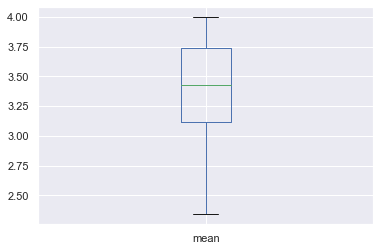

In [92]:
final_prof['mean'].plot(kind='box')

plt.show()

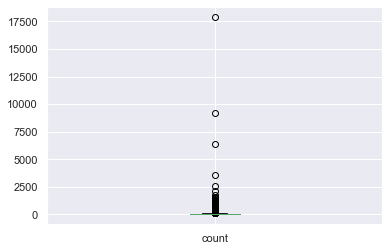

In [93]:
final_prof['count'].plot(kind='box')
plt.show()

#### The number of outliers is a bit extreme but in order to proove the alternative hypothesis it is important that I maintain a significant amount of professors that have taught many courses over the years. 

#### The upper average of professors will teach 4 classes in the Spring, 3 in the summer and 4 in the fall. Thus over the roughly 10 years that this dataset represents the upper average professor should have taught 110 classes. What is extremely odd is that some professors have taught 700 + courses. 

In [94]:
# how many prof. have taught over 500 classes 
peek = final_prof[(final_prof['count']>500) & (final_prof['count'] < 10000)]

In [95]:
len(peek)

89

In [96]:
# appropriate range of classes is between 16 and 240 
final_prof_num=final_prof[(final_prof['count']>16) & (final_prof['count'] < 240)]

In [97]:
outlier=final_prof_num['count']
#IQR=Q3-Q1
Q1=np.percentile(outlier,25)
Q3=np.percentile(outlier,75)
IQR=Q3-Q1
#[Q1-1.5*IQR,Q3+1.5*IQR]
outliers=[Q1-1.5*IQR,Q3+1.5*IQR]
outliers

[-44.5, 143.5]

In [98]:
final_prof_num['mean'].mean()

3.40473076923075

In [99]:
anomalies = []


# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_cut_off = random_data_std * 1
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies


In [100]:
find_anomalies(final_prof_num['count'])[:5]

12.900997180249448


[103, 114, 171, 120, 200]

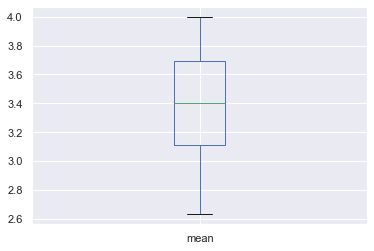

In [101]:
final_prof_num['mean'].plot(kind='box')
plt.show()

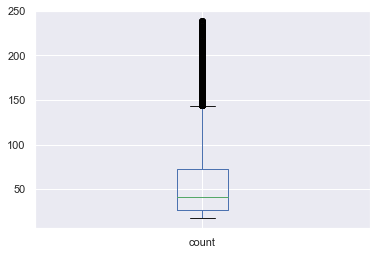

In [102]:
final_prof_num['count'].plot(kind='box')
plt.show()

# acceptble outliers between the 200 to 250 range 

In [103]:
final_prof_num.head() # this subsample of professors best represent the dataset 

,,count,mean,<=B_prob,ab_prob,a_prob
id,name,,,,,
101964,HEIDI BRITT KELLUM,24,3.95,0.018171,0.000000,0.981829
101997,DANIEL JOSEPH ACHESON,21,2.70,0.754440,0.101253,0.144307
102567,ANDREW ALEXANDER,43,3.90,0.060689,0.067893,0.871418
103387,JEFFREY ANDERS,73,3.86,0.092403,0.068648,0.838950
105156,CAROL LEE,103,3.66,0.209336,0.050462,0.740202


In [104]:
final_prof_num.describe()

,count,mean,<=B_prob,ab_prob,a_prob
count,8060.000000,8060.000000,8060.000000,8060.000000,8060.000000
mean,57.688462,3.404731,0.361976,0.191863,0.446162
std,44.790243,0.335033,0.222007,0.095923,0.237559
min,17.000000,2.630000,0.000000,0.000000,0.056939
25%,26.000000,3.110000,0.159460,0.122806,0.247471
50%,41.000000,3.400000,0.362258,0.183235,0.373630
75%,73.000000,3.690000,0.572700,0.257775,0.625794
max,239.000000,4.000000,0.943061,0.617428,1.000000


In [105]:
#outlier data 

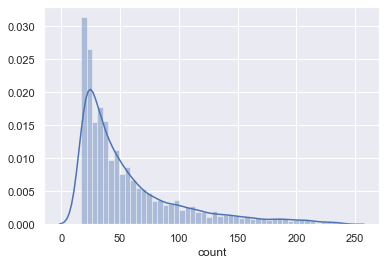

In [106]:
# skewed data is expected
sns.distplot(final_prof_num['count'])
plt.show()

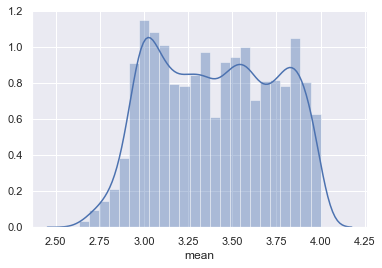

In [107]:
# non normalized dataset 
ax = sns.distplot(final_prof_num['mean'], vertical= False, )
plt.show()

In [108]:
final_prof_num['mean'].mean()

3.40473076923075

In [109]:
# split of data for number of classes taught. Data split on count mean

In [110]:
lower_sample = final_prof_num=final_prof[(final_prof['count'] < 68)]
upper_sample = final_prof_num=final_prof[(final_prof['count'] > 68)]
mid_sample = final_prof_num=final_prof[(final_prof['count'] == 68)]

In [111]:
print(len(lower_sample))
print(len(upper_sample))

15413
2610


In [112]:
# balance sample size 
low_sample = lower_sample.sample(n=len(upper_sample))

In [113]:
print(len(low_sample))
print(len(upper_sample))

2610
2610


In [114]:
tstat, pval = stats.ttest_ind(a= low_sample['mean'],
                b= upper_sample['mean'])

print('t_stat:', tstat, 'p_val: ', pval)

t_stat: -7.382085962222954 p_val:  1.804058485652646e-13


In [115]:
LS = low_sample.sample(n = 1000)
US = upper_sample.sample(n = 1000)

In [116]:
stats.ttest_ind(a= LS['mean'],
                b= US['mean'])

Ttest_indResult(statistic=-5.431313192267561, pvalue=6.276194803078275e-08)

### Our test yields an extremely low pvalue thus we can reject the null hyothesis and accept the alternative hypothesis 

In [117]:
c = conn.cursor()
c.execute("DROP VIEW IF EXISTS section_gpas")
c.execute("""
  CREATE VIEW
  section_gpas (course_offering_uuid, section_number, gpa, num_grades)
  AS
  SELECT
    course_offering_uuid,
    section_number,
    (4.0 * a_count + 3.5 * ab_count + 3.0 * b_count + 2.5 * bc_count + 2 * c_count + 1 * d_count) / (a_count + ab_count + b_count + bc_count + c_count + d_count + f_count) AS gpa,
    a_count + ab_count + b_count + bc_count + c_count + d_count + f_count AS num_grades
  FROM grade_distributions
""")

In [118]:
Department = pd.read_sql("""
  SELECT subjects.name, subjects.abbreviation,
    SUM(gpas.gpa * gpas.num_grades) / SUM(gpas.num_grades) as avg_gpa,
    AVG(gpas.num_grades) as avg_num_grades, 
    SUM(gpas.num_grades) as total_num_grades
  FROM subjects
  JOIN subject_memberships sm ON sm.subject_code = subjects.code
  JOIN course_offerings co ON co.uuid = sm.course_offering_uuid
  JOIN sections s ON s.course_offering_uuid = co.uuid
  JOIN section_gpas gpas ON gpas.course_offering_uuid = s.course_offering_uuid AND gpas.section_number = s.number
  GROUP BY subjects.code
  HAVING total_num_grades > 0
  ORDER BY avg_gpa DESC
""", conn)

In [119]:
Department.head()

,name,abbreviation,avg_gpa,avg_num_grades,total_num_grades
0,Molecular Biology,MOL BIOL,4.000000,0.140426,33
1,Ophthalmology and Visual Sciences,OPHTHALM,4.000000,0.415789,79
2,Neurological Surgery,NEURSURG,3.973333,3.947368,225
3,Neuroscience,NEURODPT,3.965957,2.043478,235
4,Art Education (Department of Art),ART ED,3.954456,9.116071,2042


In [120]:
Department = Department.drop(['avg_num_grades'], axis=1)

In [121]:
Department.head()

,name,abbreviation,avg_gpa,total_num_grades
0,Molecular Biology,MOL BIOL,4.000000,33
1,Ophthalmology and Visual Sciences,OPHTHALM,4.000000,79
2,Neurological Surgery,NEURSURG,3.973333,225
3,Neuroscience,NEURODPT,3.965957,235
4,Art Education (Department of Art),ART ED,3.954456,2042


### Now we can look at "Do STEM departments have a statistically significantly difference in average GAP when compared to the humanities?

In [122]:
Department.head()

,name,abbreviation,avg_gpa,total_num_grades
0,Molecular Biology,MOL BIOL,4.000000,33
1,Ophthalmology and Visual Sciences,OPHTHALM,4.000000,79
2,Neurological Surgery,NEURSURG,3.973333,225
3,Neuroscience,NEURODPT,3.965957,235
4,Art Education (Department of Art),ART ED,3.954456,2042


In [123]:
#dept = pd.read_csv('uw-madison-courses/Departments.csv')  #dataset with STEM departments tagged

In [124]:
#dept = dept.sort_values('name', ascending=True)

In [125]:
Department

,name,abbreviation,avg_gpa,total_num_grades
0,Molecular Biology,MOL BIOL,4.000000,33
1,Ophthalmology and Visual Sciences,OPHTHALM,4.000000,79
2,Neurological Surgery,NEURSURG,3.973333,225
3,Neuroscience,NEURODPT,3.965957,235
4,Art Education (Department of Art),ART ED,3.954456,2042
5,Family Medicine,FAM MED,3.932018,228
6,Curriculum and Instruction,CURRIC,3.912719,56341
7,Military Science,MIL SCI,3.909865,4521
8,Educational Leadership and Policy Analysis,ELPA,3.900249,10862
9,Rehabilitation Psychology and Special Education,RP & SE,3.896153,24642


In [126]:
Department = Department.sort_values('name', ascending=True)

In [127]:
stem_dept_stu = Department[Department['abbreviation'] == 'STEM']

In [128]:
oth_dept_stu = Department[Department['abbreviation'] != 'STEM']

In [129]:
stem_dept_stu['total_num_grades'].sum()

0

In [130]:
oth_dept_stu['total_num_grades'].sum()

5285987

In [131]:
stem_dept = Department[Department['abbreviation'] == 'STEM']

In [132]:
oth_dept = Department[Department['abbreviation'] != 'STEM']

In [133]:
len(stem_dept)

0

In [134]:
len(oth_dept)

191

In [135]:
stats.ttest_ind(a= stem_dept['avg_gpa'],
                b= oth_dept['avg_gpa'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [136]:
stem_dept['avg_gpa'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: avg_gpa, dtype: float64

In [137]:
oth_dept['avg_gpa'].describe()

count    191.000000
mean       3.501571
std        0.234586
min        2.906503
25%        3.364478
50%        3.503756
75%        3.663693
max        4.000000
Name: avg_gpa, dtype: float64

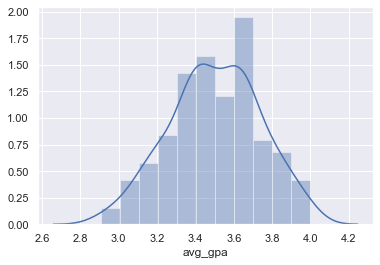

In [138]:
sns.distplot(Department['avg_gpa'])
plt.show()

In [139]:
# levenes test is robust to data that is not normalized, pvalue indicates that the two variances 
# are approximately equal

In [140]:
final_prof['mean']=round(final_prof['mean'],2)
final_prof.head()

,,count,mean,<=B_prob,ab_prob,a_prob
id,name,,,,,
100191,SCOTT CRAVEN,14,3.19,0.480192,0.118547,0.401261
100475,DIANNA MURPHY,2,3.94,0.055556,0.000000,0.944444
101964,HEIDI BRITT KELLUM,24,3.95,0.018171,0.000000,0.981829
101997,DANIEL JOSEPH ACHESON,21,2.70,0.754440,0.101253,0.144307
102482,JONATHAN ANDREW FOLEY,10,3.73,0.163271,0.192260,0.644469


In [141]:
#Department.to_csv('dept_status.csv')
!rm fp.csv
final_prof.to_csv('export/fp.csv') 

rm: fp.csv: No such file or directory
